link to the dataset https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

In [18]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
house_data = pd.read_csv("C:\\Users\\PC\\Desktop\\Python\\Dataset\\Housing.csv")
house_data 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [19]:
house_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [20]:
house_data.duplicated().sum()

0

In [21]:
house_data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [23]:
categorical_list = [x for x in house_data.columns if df[x].dtype =='object']

[]


In [24]:
categorical_list

[]

In [25]:
house_data['mainroad'] = house_data['mainroad'].map({'yes': 1, 'no': 0})
house_data['guestroom'] = house_data['guestroom'].map({'yes': 1, 'no': 0})
house_data['basement'] = house_data['basement'].map({'yes': 1, 'no': 0})
house_data['hotwaterheating'] = house_data['hotwaterheating'].map({'yes': 1, 'no': 0})
house_data['airconditioning'] = house_data['airconditioning'].map({'yes': 1, 'no': 0})
house_data['prefarea'] = house_data['prefarea'].map({'yes': 1, 'no': 0})
house_data['furnishingstatus'] = house_data['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})

In [26]:
house_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


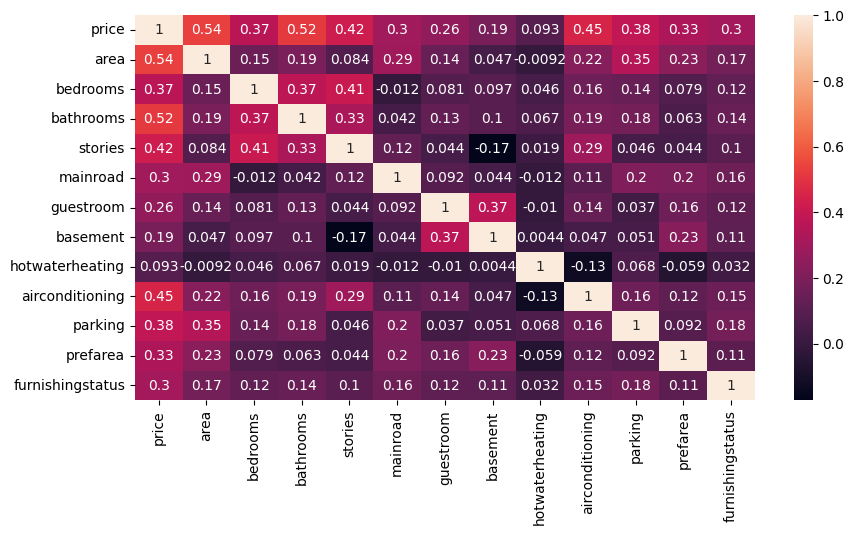

In [27]:
plt.figure(figsize=(10,5))
sns.heatmap(house_data.corr(),annot=True)
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
X = house_data.drop('price', axis=1)
y = house_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

In [30]:
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gradient_boosting_model.fit(X_train, y_train)
y_pred = gradient_boosting_model.predict(X_test)

In [31]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse , r2 

(1692436708033.202, 0.6651670417970582)

In [32]:
predicted_price = gradient_boosting_model.predict([[5900,4,2,2,0,0,1,0,0,1,0,0]])
print(predicted_price)

[4549951.15887979]


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
